In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import tree
from sklearn.metrics import mean_squared_error,r2_score
from IPython.display import Image
import pydotplus
import graphviz

Loding the Sample Data

In [3]:
df = pd.read_csv("/Users/priya/Documents/GitHub/Classification-Models/Decision_Trees/Regression Trees/Data/Movie_regression.csv", header=0)


df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Note: From the above information we can see that Time_Taken is having missing data.

### Lets use mean method to handle missing values

In [5]:
# to identify the mean value

df["Time_taken"].mean()

np.float64(157.3914979757085)

In [6]:
# Imputing mean value into the null values

df["Time_taken"].fillna(value = df['Time_taken'].mean(), inplace = True)

/var/folders/2b/wgc3l8k55bv300zzsy079nqr0000gn/T/ipykernel_11744/3569830908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Time_taken"].fillna(value = df['Time_taken'].mean(), inplace = True)


In [7]:
# If we check now Time_Taken is having all 506 values. Previously we had only 494

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Convert all categorical values to numerical using Dummy Variable Creation

The number of dummy variables should be (n-1) which means (number of categorical values -1). So drop_first will be set to True

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [9]:
# We have 3D_available and Genre columns which need this conversion

# df = pd.get_dummies(df,columns=["3D_available","Genre"],drop_first=True) # This code gives True or False in dummy variables instead of boolean values
df = pd.get_dummies(df, columns=["3D_available","Genre"], drop_first=True, dtype=int)

In [10]:
# We can see the created new dummy variables which are 3D_available_YES, Genre_Comedy, Genre_Drama, Genre_Thriller
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


Lets divide our df dataframe into two parts. Those are **independent variables (X)** and **target variable (y)**.

- Here target variable is **Collection** variable 
- All other variables in the table are **independed variables**

In [11]:
X = df.loc[:,df.columns!="Collection"]

print(X.head())
print(X.shape)

   Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   
1            20.5462               69.14               0.531  35668.655   
2            20.5458               69.14               0.531  39912.675   
3            20.6474               59.36               0.542  38873.890   
4            21.3810               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  Trailer_views  Time_taken  Twitter_hastags  \
0    

In [12]:
y = df["Collection"]
print(y.head())
print(y.shape)


0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64
(506,)


## Train and Test Split

Usually we do not train our model on all available data. Instead we take a small portion of data from the available data to test our model. This way help us to understand how efficiently our model might work on the real time data.

- Generally it is recommended to take 80% data for training and 20% data for training
- We need to test the model performance by comparing different models using only test data. This will help us in evaluation of model.


The random_state parameter in the train_test_split function is used to ensure reproducibility of the data splitting process.
- more detailed explanation can be found here (https://medium.com/@priyanka.talla09/understanding-the-random-state-parameter-in-machine-learning-cb2be6934f58)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
display(HTML(X_train.head(2).to_html()))
print(X_train.shape)

display(HTML(X_test.head(2).to_html()))
print(X_test.shape)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.64,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.40,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0


(404, 19)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
329,21.3448,61.48,0.540,35179.815,90.7,7.32,7.460,7.275,7.515,8.62,483051,111.04,283.616,53,452,0,1,0,0
371,204.6460,91.20,0.369,34529.880,173.5,9.31,9.525,9.320,9.505,7.96,454281,196.00,268.000,25,609,1,1,0,0


(102, 19)


Steps we follow for all classification or regression in Sklearn
Creation of classifier or regression object
Then we need to fit X train and y train data into classifier or regression object
then predict depent variable values in X test and y test data

In [15]:
# it is recommended that max_depth should not be greater than 5 for better interpretability
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [16]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

Predict values using trained model

In [17]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [18]:
y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

Calculation of model performance using predicted values

- Here you have more detailed explanation on the metrics we used to evaluate model performance
https://medium.com/@priyanka.talla09/understanding-r-squared-and-mean-squared-error-in-regression-tree-model-performance-494ffbf5b5ac

In [19]:
# We can only use MSE to calculate perfomance of different models on same dataset. So we don't need to cosider MSE for current use case.
mean_squared_error(y_test,y_test_pred)

np.float64(117077216.27161306)

In [20]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [21]:
r2_score(y_test,y_test_pred)

0.636321038122745

Plotting Decision Tree on Trained Data

In [22]:
dot_data = tree.export_graphviz(regtree,out_file=None)

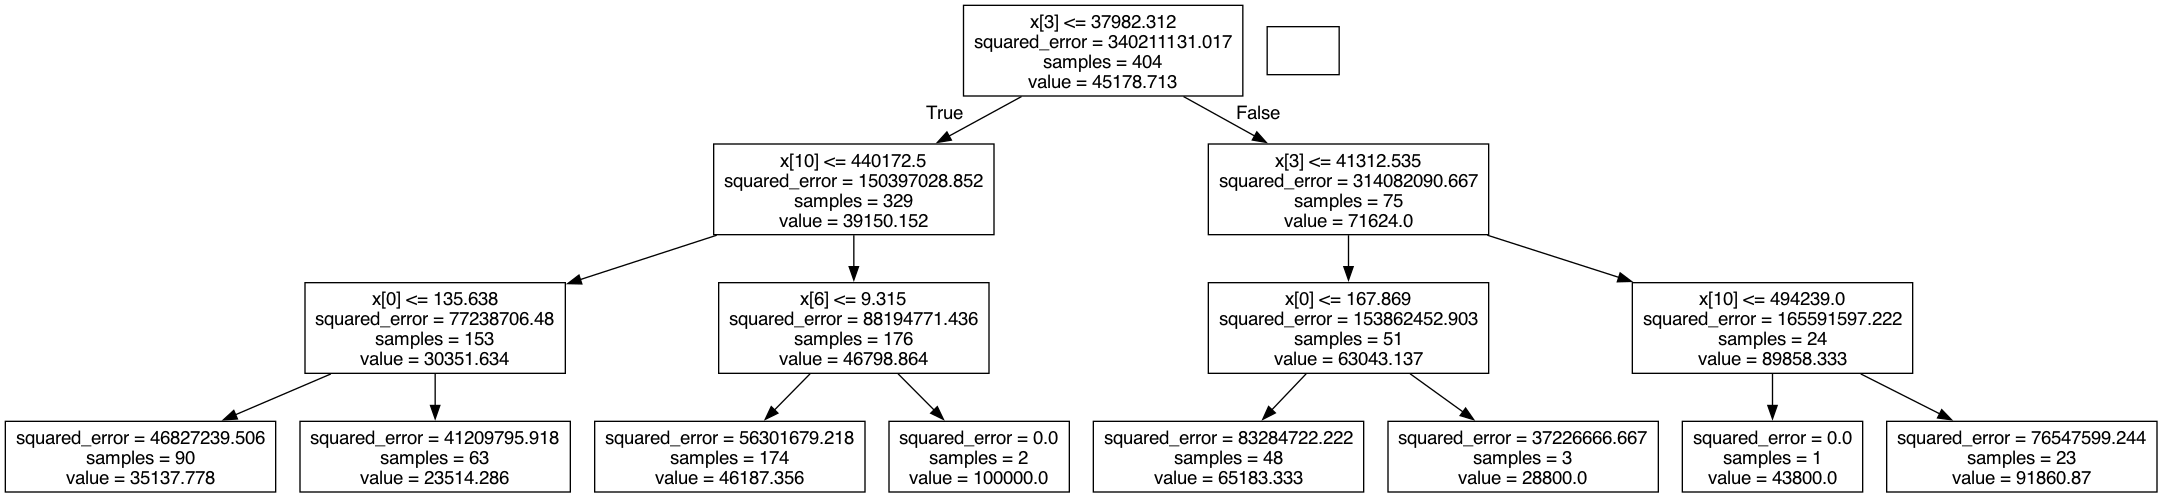

In [23]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Controlling Tree growth with Pruning a tree technique
- in python post pruning does not work only pre pruning works

There are 3 ways to controll the tree growth
- Max depth
- Min samples required at internal note for split
- min sample required in the leaf node

### Different methods of pruning a tree
Method 1 -  Maximum number of levels in tree

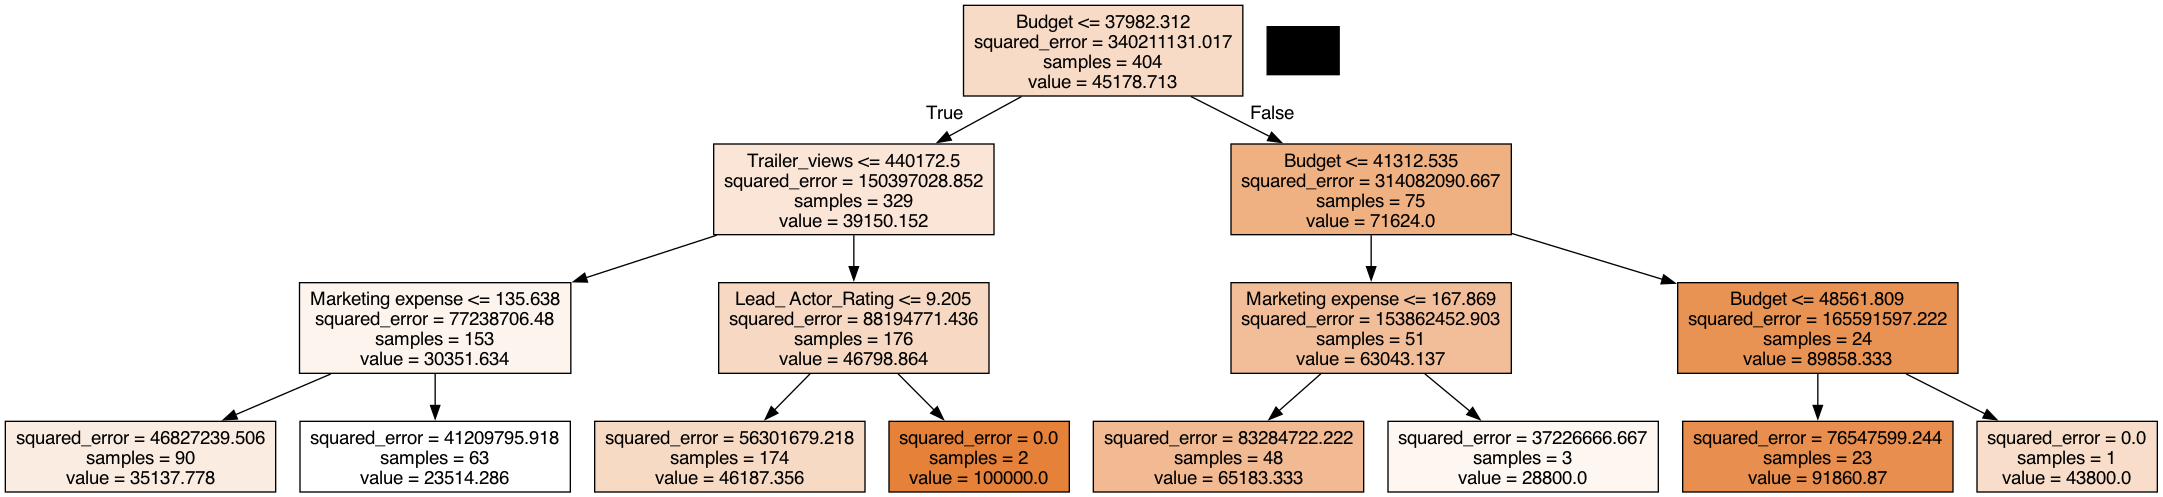

In [29]:
regtree1 = tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train, y_train)

dot_data = tree.export_graphviz(regtree1, out_file=None, feature_names=X_train.columns,filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

Method 2 - Minimum observations required at internal node

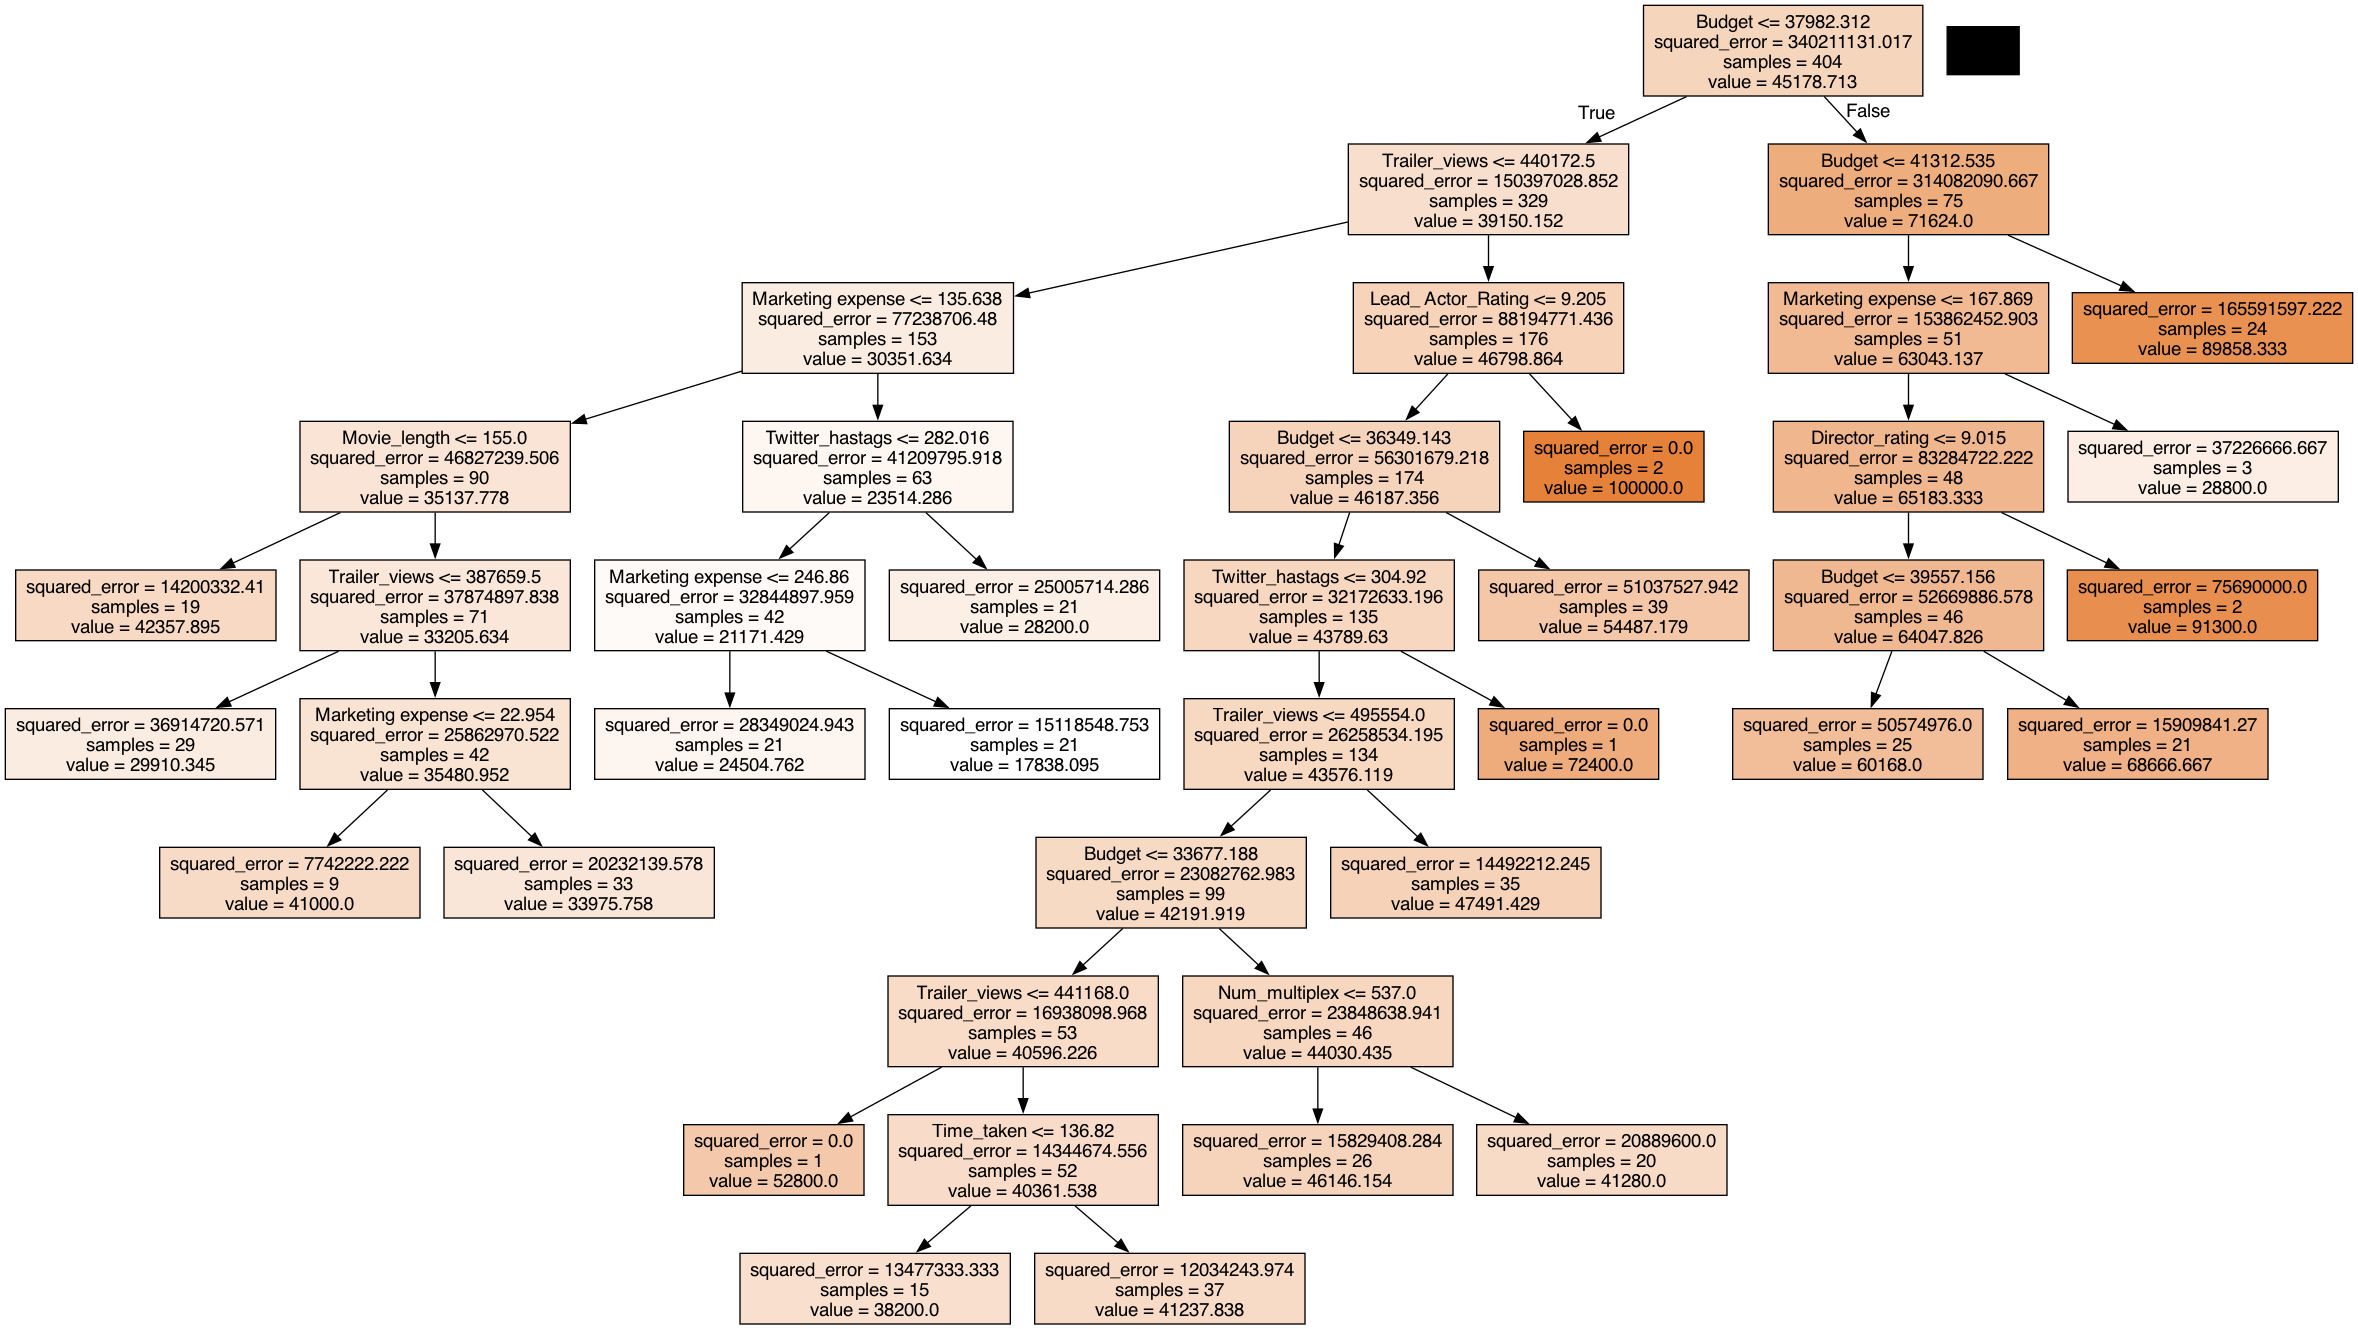

In [30]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split=40)
regtree2.fit(X_train, y_train)

dot_data = tree.export_graphviz(regtree2, out_file=None, feature_names=X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

Method 3 - Minimum number of nodes required at leaf nodes

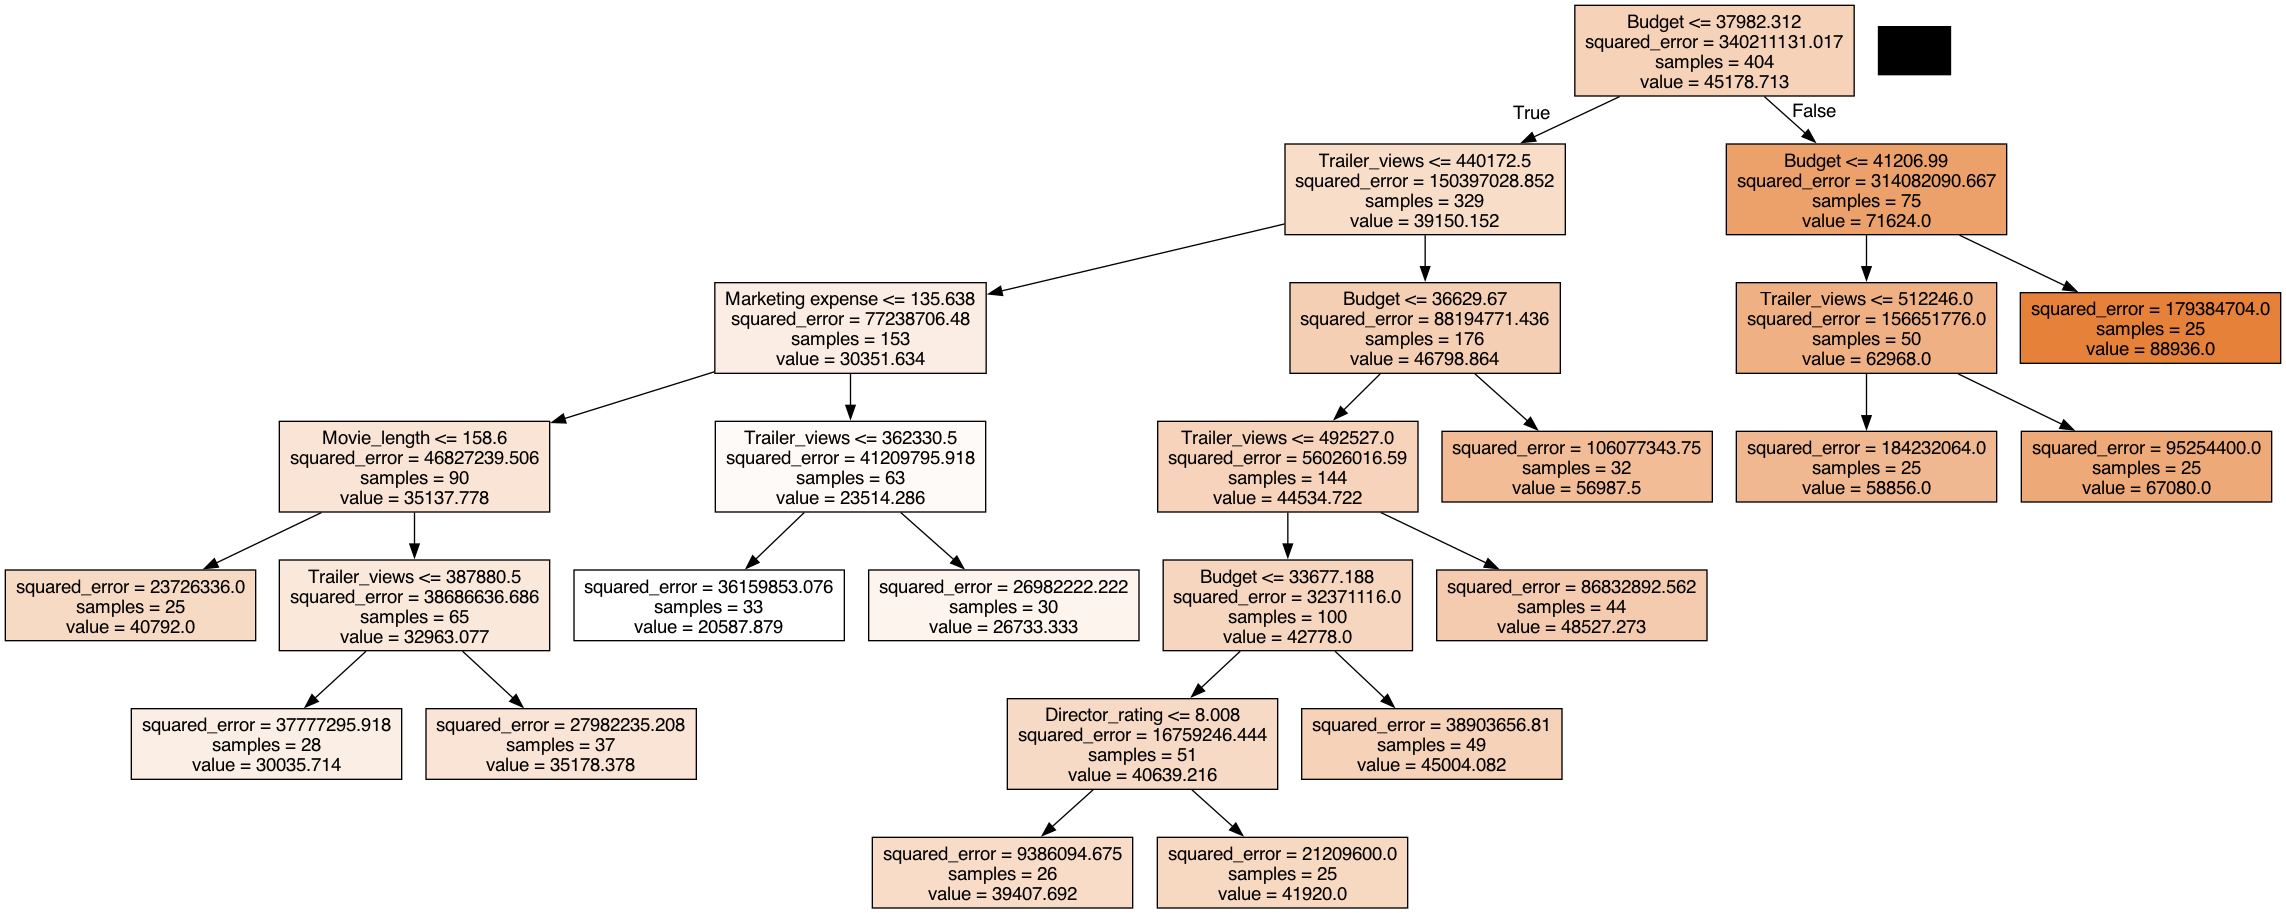

In [32]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf=25)
regtree3.fit(X_train, y_train)

dot_data = tree.export_graphviz(regtree3, out_file=None, feature_names=X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())
